In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras
import tensorflow as tf
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

%config InlineBackend.figure_format = 'retina' # для более четкой отрисовки графиков

In [4]:
ds = pd.read_csv('heart.csv') # загружаем данные

In [6]:
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
ds.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
ds.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [39]:
x_train, x_test,  y_train, y_test = train_test_split(ds.drop(['target'], axis=1), 
                                                    ds['target'],
                                                    test_size=0.2
                                                   ) # разделим на тренировочную и тестовую выборки

transformer = PowerTransformer(standardize=True)
x_train = transformer.fit_transform(x_train) # нормализируем и стандартизируем выборку
x_test = transformer.transform(x_test) # нормализируем и стандартизируем выборку
y_train = np.array(y_train)
y_test = np.array(y_test)

In [43]:
input_ = keras.layers.Input(shape=(13,)) # входной слой
x = keras.layers.Dense(32, activation='relu')(input_) # полносвязный слой
x = keras.layers.Dense(16, activation='relu')(x) # полносвязный слой
output_ = keras.layers.Dense(1, activation='sigmoid')(x) # выходной слой

model = keras.models.Model(input_, output_) # определем въод и выход моедли

model.compile(loss = 'binary_crossentropy', # определяем метрики и алгоритм оптимизации
              optimizer = 'adam',
              metrics = ['accuracy']
             )

history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2) # сохраняем историю тренировки

Epoch 1/20
7/7 [==============================] - 0s 17ms/step - loss: 0.7084 - accuracy: 0.4633 - val_loss: 0.6912 - val_accuracy: 0.5102
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.5778 - val_loss: 0.6641 - val_accuracy: 0.5510
Epoch 3/20
7/7 [==============================] - 0s 4ms/step - loss: 0.6393 - accuracy: 0.6671 - val_loss: 0.6406 - val_accuracy: 0.5918
Epoch 4/20
7/7 [==============================] - 0s 4ms/step - loss: 0.6175 - accuracy: 0.7250 - val_loss: 0.6169 - val_accuracy: 0.6939
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 0.5981 - accuracy: 0.7612 - val_loss: 0.5953 - val_accuracy: 0.6939
Epoch 6/20
7/7 [==============================] - 0s 4ms/step - loss: 0.5794 - accuracy: 0.7732 - val_loss: 0.5737 - val_accuracy: 0.6939
Epoch 7/20
7/7 [==============================] - 0s 4ms/step - loss: 0.5460 - accuracy: 0.8062 - val_loss: 0.5515 - val_accuracy: 0.7143
Epoch 8/20
7/7 [=================

In [54]:
model.summary() # архитектура модели

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_42 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_43 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


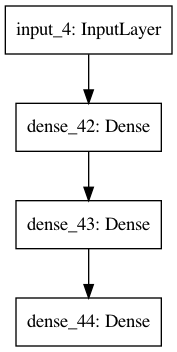

In [57]:
keras.utils.plot_model(model) # архитектура сети

<AxesSubplot:>

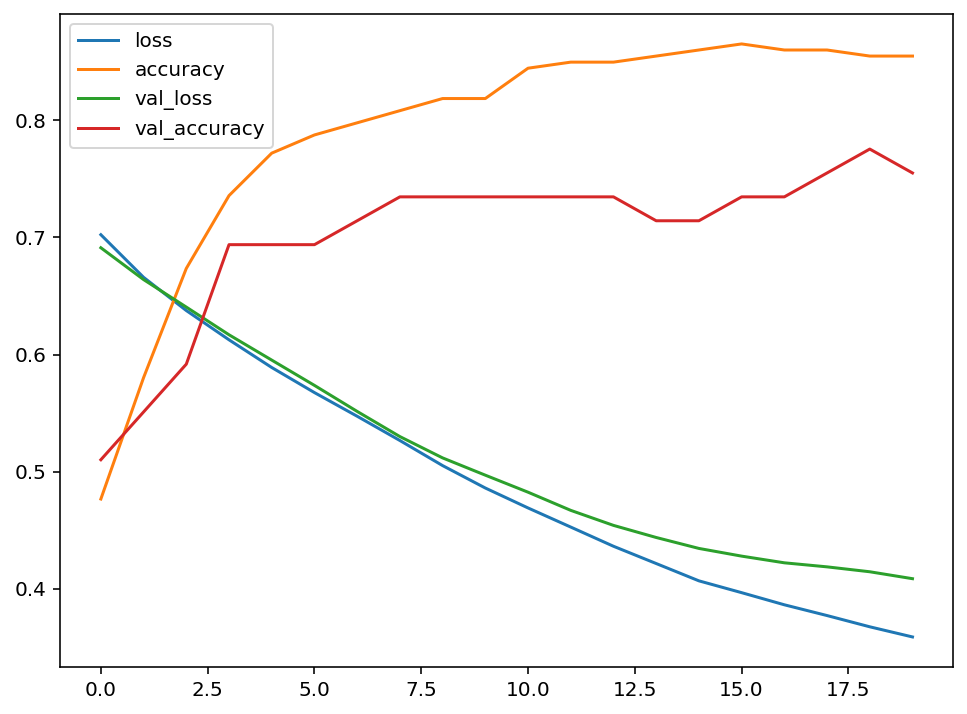

In [56]:
pd.DataFrame(history.history).plot(figsize=(8,6)) # метрики и функции потерь

In [67]:
print('Точность модели на тестовой выборке: %.3f' % accuracy_score(y_test, np.round(model.predict(x_test))))

Точность модели на тестовой выборке: 0.803


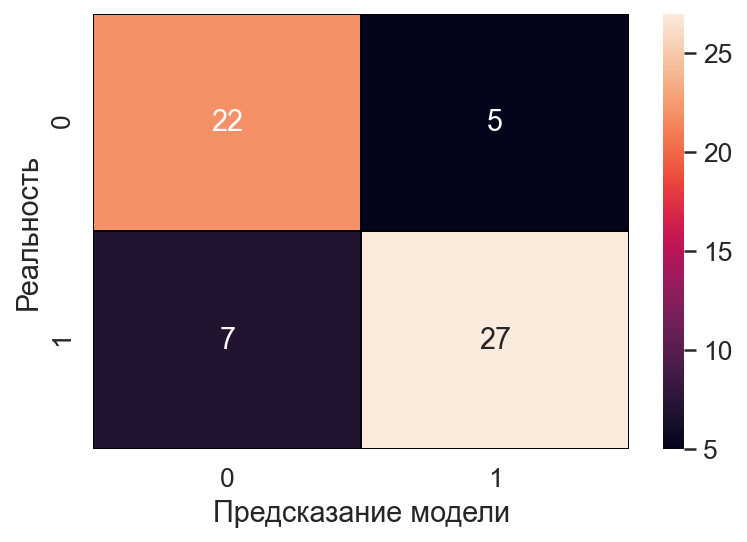

In [70]:
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, np.round(model.predict(x_test))), 
            annot=True, 
            fmt = '.3g',
            linewidths=0.1,
            linecolor='black'
           );
plt.xlabel('Предсказание модели')
plt.ylabel('Реальность');